In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from rberga06.phylab import Datum as d
import math

In [38]:
# Load data
files = [pd.read_csv(f"data/TEK{i:05}.CSV", skiprows=15) for i in range(51)]
print(len(files))

51


5.040322580645257 Hz, 4.9544193420530185 Hz
4.997001798920647 Hz


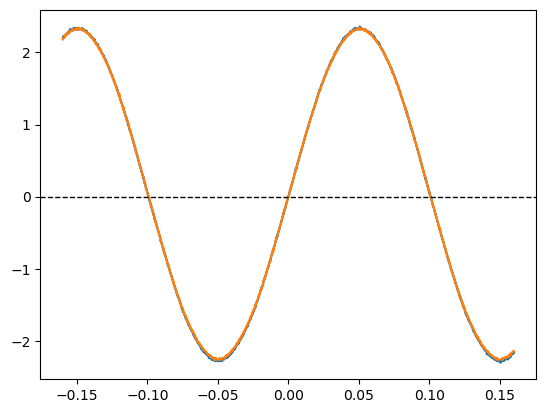

1.0072522159548754 Hz
1.0072522159548754 Hz


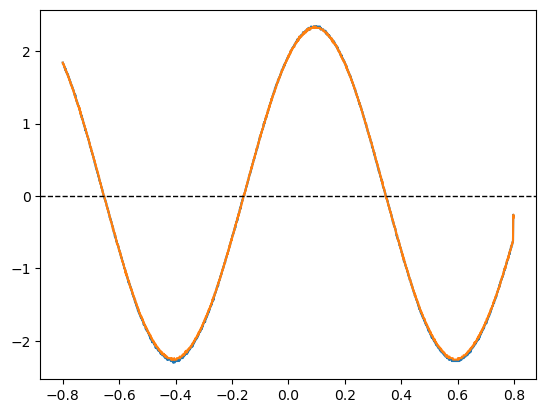

10.080645161290514 Hz, 9.904912836766853 Hz
9.992006394884093 Hz


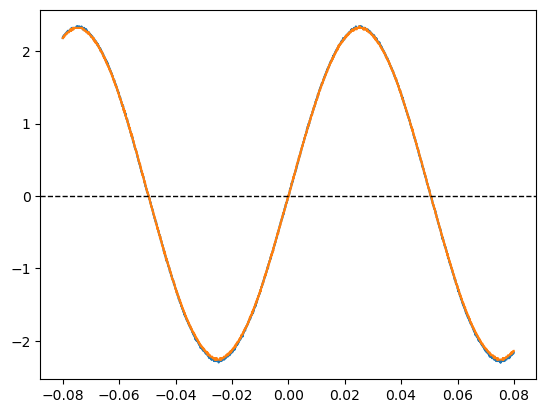

10.137875101378945 Hz, 9.960159362549613 Hz
10.04823151125402 Hz


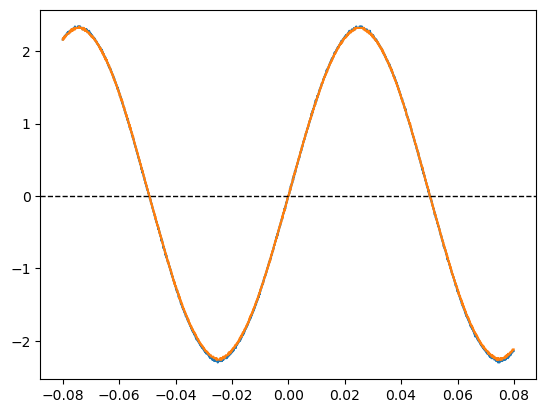

10.032102728731942 Hz
10.032102728731942 Hz


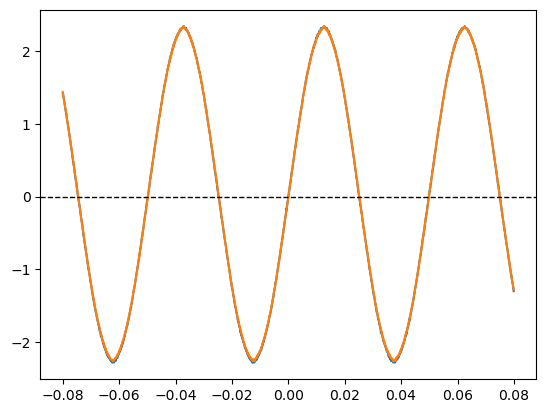

50.48465266558841 Hz, 49.70178926441473 Hz
50.09016229212583 Hz


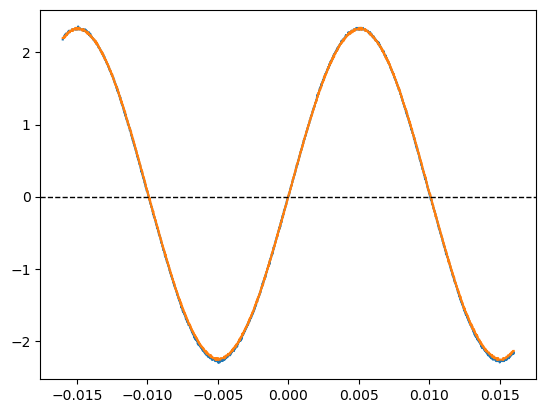

33.45824411134904 Hz
33.45824411134904 Hz


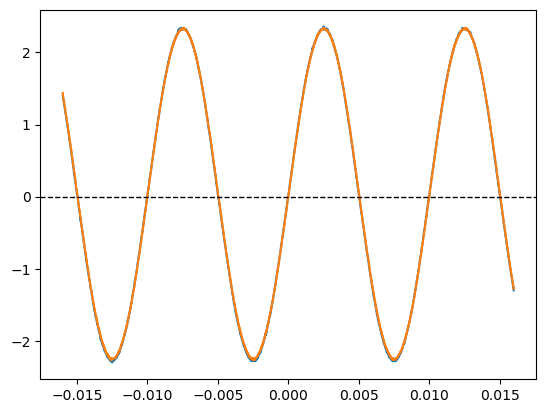

66.63113006396588 Hz
66.63113006396588 Hz


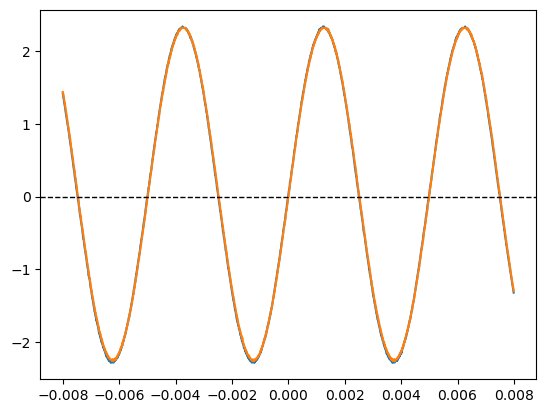

503.6261079774375 Hz, 495.83498611662037 Hz
499.7001798920648 Hz


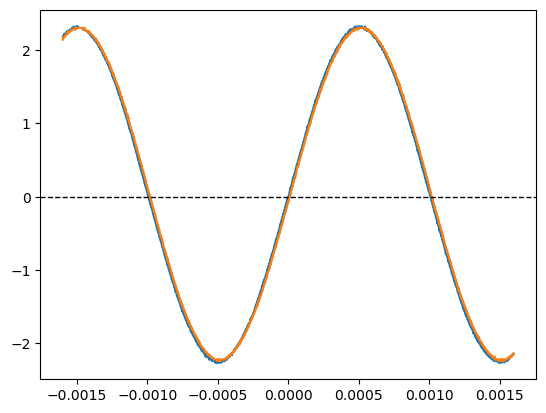

992.8514694201874 Hz
992.8514694201874 Hz


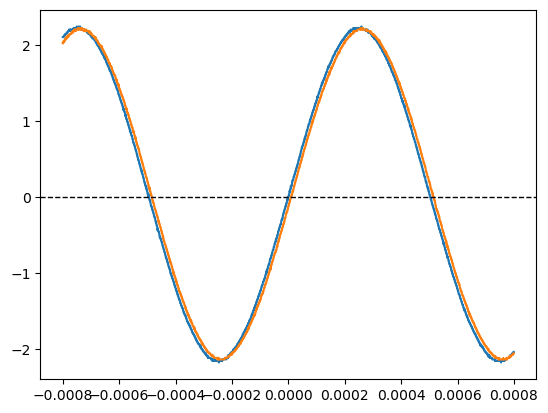

2026.7531414673695 Hz, 1986.491855383393 Hz
2006.4205457463886 Hz


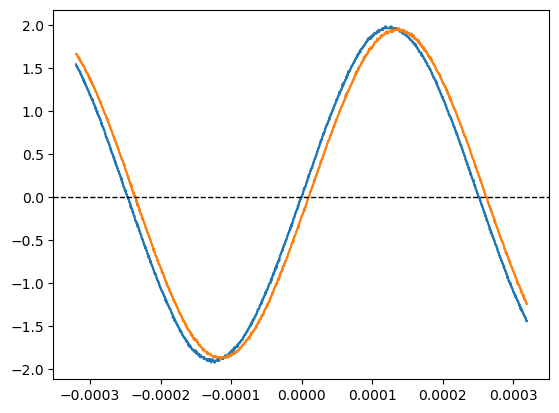

2022.4900897985713 Hz, 1989.02060625347 Hz
2005.6157240272764 Hz


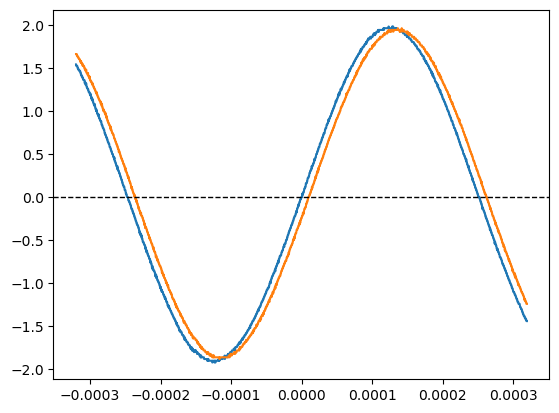

1003.3109260559849 Hz
1003.3109260559849 Hz


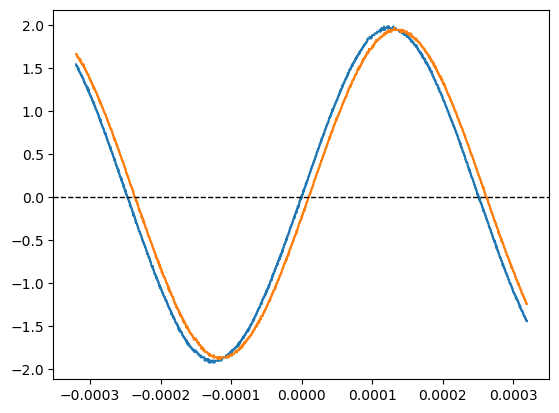

1388888.888888889 Hz
1388888.888888889 Hz


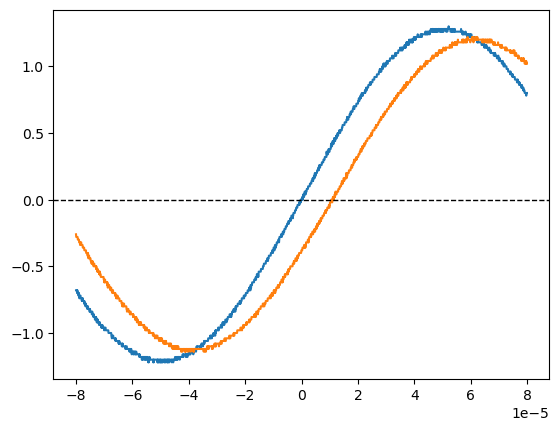

7617.306520414383 Hz, 7396.449704142012 Hz
7505.253677574303 Hz


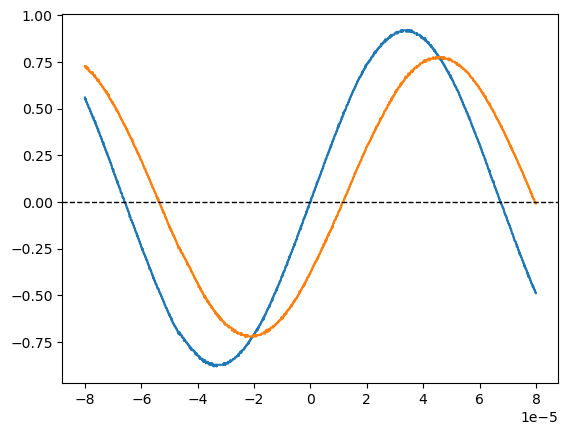

10195.758564437194 Hz, 9811.616954474097 Hz
10000.0 Hz


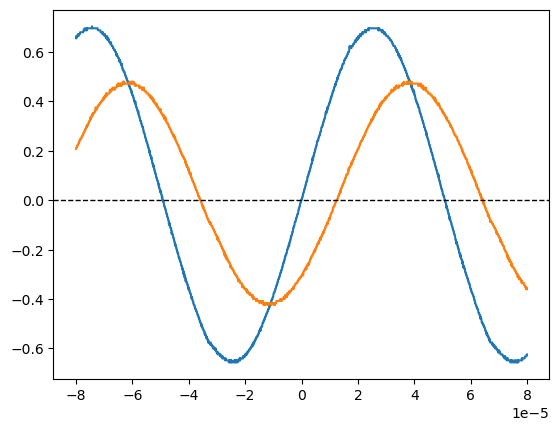

14654.161781946073 Hz, 15375.153751537515 Hz, 14619.88304093567 Hz, 15337.423312883438 Hz
14988.00959232614 Hz


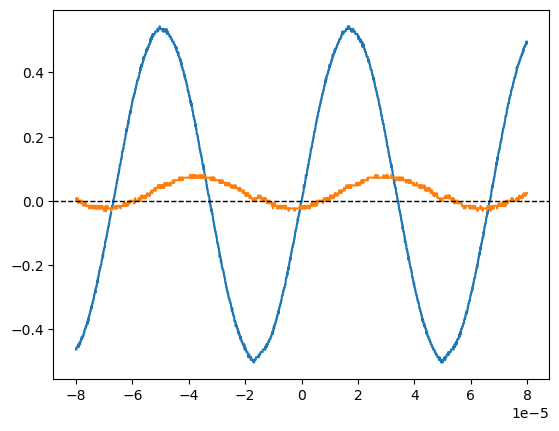

20559.21052631579 Hz, 19531.249999999996 Hz, 20593.080724876443 Hz, 19592.476489028213 Hz, 20559.21052631579 Hz, 19561.81533646323 Hz
20053.475935828876 Hz


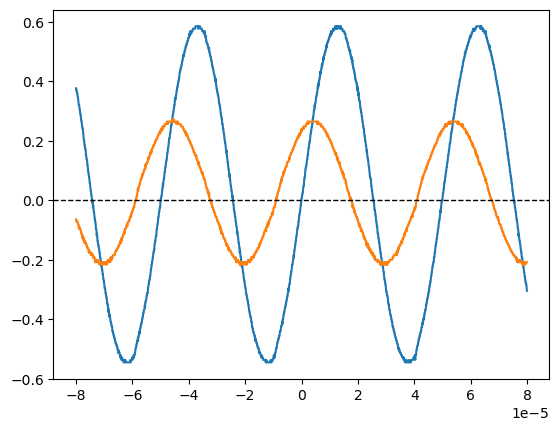

ZeroDivisionError: division by zero

In [39]:
for (i, f) in enumerate(files):
    if i < 2: continue
    time, ch1, ch2 = f["TIME"], f["CH1"], f["CH2"]

    zeri = []
    last_zero = []
    last_i = -1
    for (_i, x) in time[ch1.between(-1e-2,1e-2)].items():
        i2 = int(_i)
        if i2 - last_i == 1:
            last_zero.append(x)
        elif last_zero:
            zeri.append((last_zero[-1] + last_zero[0])/2)
            last_zero.clear()
        last_i = i2
    if last_zero:
        zeri.append((last_zero[-1] + last_zero[0])/2)
    del last_i, last_zero

    _diffs = [zeri[i] - zeri[i-1] for i in range(1, len(zeri))]
    print(*[f"{1 / (2*x)} Hz" for x in _diffs], sep=", ")
    T = 2 * (sum(_diffs)/(len(zeri)-1))
    print(1/T, "Hz")

    fig, ax = plt.subplots()
    ax.plot(time, ch1)
    ax.plot(time, ch2)
    ax.axhline(0, color="0.0", linestyle="--", linewidth=1, rasterized=True)
    plt.show()